In [1]:
import re

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
text = ['The quick brown fox jumped over the lazy dog']
vectorizer = CountVectorizer()
vectorizer.fit(text)
print(vectorizer.vocabulary_)
vector = vectorizer.transform(text)
print(vector)
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	2
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [1]:
import nltk
import pandas as pd
import sys
df = pd.read_csv('datasets\singlish.txt', sep="\t", header=None, names = ["class", "msg"])
df = df[['msg', 'class']] # reorder index
df['class'] = df['class'].replace(['ham'], '0').replace(['spam'], '1') # represents class using number
df.language = 'english'
df.stop_words = nltk.corpus.stopwords.words(df.language)

KeyboardInterrupt: 

In [5]:
df2 = pd.read_csv('datasets\indo.csv')
df2.columns = ['msg', 'class'] #rename
df2['class'] = df['class'].replace([1,2], '1') # promo & fraud = spam (1)
df2.language = 'indonesian'
df2.stop_words = nltk.corpus.stopwords.words(df.language)

C:\Users\asus\Anaconda3a\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [6]:
df.head()

,msg,class
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
df2.head()

,msg,class
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,0
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,0
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",1
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",0
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,0


In [8]:
#preproccs DF1

In [9]:
import matplotlib.pyplot as plt
spam_count = df.groupby('class').count()
spam_count

,msg
class,
0,4825
1,747


Text(0, 0.5, 'Number of Spam Texts')

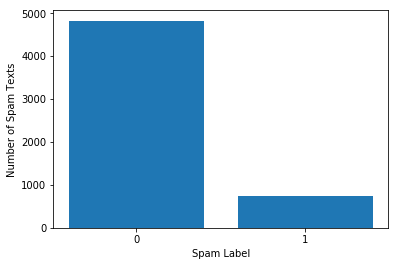

In [10]:
plt.bar(spam_count.index.values, spam_count['msg'])
plt.xlabel('Spam Label')
plt.ylabel('Number of Spam Texts')

In [11]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')

In [12]:
text_table = df.msg

In [13]:
text_table = text_table.apply(lambda x: ' '.join(
    term for term in x.split() if term not in set(stop_words))
)
text_table = text_table.str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',
                                   'emailaddr')
text_table = text_table.str.replace(r'(https[s]?\S+)|(\w+\.[A-Za-z]{2,4}\s*)',
                                   'httpaddr')
text_table = text_table.str.replace(
    r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
    'phonenumbr')
text_table = text_table.str.replace(r'\d+(\.\d+)?','numbr')
text_table = text_table.str.lower()
text_table = text_table.str.replace(r'[^\w\d\s]',' ')
text_table = text_table.str.replace(r'\s+',' ')
text_table = text_table.str.replace(r'^\s+|\s+?$','')

In [14]:
from nltk.stem import WordNetLemmatizer 
lem = nltk.WordNetLemmatizer() 

In [15]:
df.msg = text_table.apply(lambda x: ' '.join(
   lem.lemmatize(term) for term in x.split())
)

In [16]:
porter = nltk.PorterStemmer()
df.msg = text_table.apply(lambda x: ' '.join(
    porter.stem(term) for term in x.split())
)

In [17]:
df.msg.head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri numbr wkli comp win fa cup final tk...
3                  u dun say earli hor u c alreadi say
4               nah i think goe usf live around though
Name: msg, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
text1=cv.fit_transform(text_table)
text1

<5572x7838 sparse matrix of type '<class 'numpy.int64'>'
	with 45205 stored elements in Compressed Sparse Row format>

In [19]:
porter = nltk.PorterStemmer()
text_table2 = text_table.apply(lambda x: ' '.join(
    porter.stem(term) for term in x.split())
)

In [20]:
text2=cv.fit_transform(text_table2)
text2

<5572x6541 sparse matrix of type '<class 'numpy.int64'>'
	with 45471 stored elements in Compressed Sparse Row format>

In [21]:
s=' '.join(df.msg)
str_list = s.lower().split()
unique_words = set(str_list)

In [22]:
dictwords = dict()
for words in unique_words:
    dictwords[words] = [str_list.count(words)]

In [23]:
df.head()

,msg,class
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri numbr wkli comp win fa cup final tk...,1
3,u dun say earli hor u c alreadi say,0
4,nah i think goe usf live around though,0


In [24]:
dataham = df[df['class'] == '0']

In [25]:
dataspam = df[df['class'] == '1']

In [26]:
sham = ' '.join(dataham.msg)
sspam = ' '.join(dataspam.msg)
sham_list = sham.lower().split()
sspam_list = sspam.lower().split()

In [27]:
for words in unique_words :
    iham=sham_list.count(words)
    ispam=sspam_list.count(words)
    dictwords[words].append(iham)
    dictwords[words].append(ispam)
    dictwords[words].append(ispam-iham)
    

In [28]:
sortfreq = sorted(dictwords.items(), key=lambda x: x[1][0], reverse=True)

In [29]:
dictfreq = sortfreq[:100]
len(dictfreq)
dictfreq

[('numbr', [2479, 884, 1595, 711]),
 ('i', [2243, 2188, 55, -2133]),
 ('u', [1198, 1024, 174, -850]),
 ('call', [667, 291, 376, 85]),
 ('you', [548, 417, 131, -286]),
 ('s', [505, 418, 87, -331]),
 ('go', [455, 420, 35, -385]),
 ('get', [444, 354, 90, -264]),
 ('m', [427, 403, 24, -379]),
 ('phonenumbr', [408, 1, 407, 406]),
 ('it', [390, 378, 12, -366]),
 ('ur', [390, 246, 144, -102]),
 ('gt', [318, 318, 0, -318]),
 ('lt', [316, 316, 0, -316]),
 ('now', [305, 170, 135, -35]),
 ('come', [302, 297, 5, -292]),
 ('free', [282, 59, 223, 164]),
 ('ok', [282, 277, 5, -272]),
 ('know', [273, 247, 26, -221]),
 ('day', [272, 240, 32, -208]),
 ('like', [259, 246, 13, -233]),
 ('love', [259, 249, 10, -239]),
 ('time', [249, 230, 19, -211]),
 ('want', [247, 214, 33, -181]),
 ('no', [245, 191, 54, -137]),
 ('me', [243, 233, 10, -223]),
 ('t', [240, 159, 81, -78]),
 ('good', [240, 228, 12, -216]),
 ('got', [238, 231, 7, -224]),
 ('text', [229, 86, 143, 57]),
 ('ll', [227, 224, 3, -221]),
 ('how', [2

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier

In [31]:
models = {
"knn": KNeighborsClassifier(n_neighbors=1),
"naive_bayes": GaussianNB(),
"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
"svm": SVC(kernel="rbf", gamma="auto"),
"decision_tree": DecisionTreeClassifier(),
"random_forest": RandomForestClassifier(n_estimators=100),
"multi_nb": MultinomialNB(),
 "mlp": MLPClassifier(),}

In [32]:
X=df.msg
y=df['class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [34]:
vectorizer= CountVectorizer()
counts = vectorizer.fit_transform(X_train.values)

In [35]:
classifier = MultinomialNB()
targets =y_train.values
classifier.fit(counts,targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:

model_name="multi_nb"
model = models[model_name]
model.fit(counts,targets)
exp_count=vectorizer.transform(X_test)
predictions= classifier.predict(exp_count)
print("[INFO] using '{}' model".format(model_name))
print("[INFO] evaluating...")
#predictions = model.predict(testX)

print(classification_report(y_test, predictions,
target_names=['ham','spam']))

[INFO] using 'multi_nb' model
[INFO] evaluating...
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1212
        spam       0.98      0.98      0.98       181

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.99      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393



In [37]:

model_name="knn"
model = models[model_name]
model.fit(counts,targets)
exp_count=vectorizer.transform(X_test)
predictions= classifier.predict(exp_count)
print("[INFO] using '{}' model".format(model_name))
print("[INFO] evaluating...")
#predictions = model.predict(testX)

print(classification_report(y_test, predictions,
target_names=['ham','spam']))

[INFO] using 'knn' model
[INFO] evaluating...
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1212
        spam       0.98      0.98      0.98       181

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.99      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393



In [38]:
model_name="mlp"
model = models[model_name]
model.fit(counts,targets)
exp_count=vectorizer.transform(X_test)
predictions= classifier.predict(exp_count)
print("[INFO] using '{}' model".format(model_name))
print("[INFO] evaluating...")
#predictions = model.predict(testX)

print(classification_report(y_test, predictions,
target_names=['ham','spam']))

[INFO] using 'mlp' model
[INFO] evaluating...
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1212
        spam       0.98      0.98      0.98       181

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.99      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393



In [39]:
model_name="logit"
model = models[model_name]
model.fit(counts,targets)
exp_count=vectorizer.transform(X_test)
predictions= classifier.predict(exp_count)
print("[INFO] using '{}' model".format(model_name))
print("[INFO] evaluating...")
#predictions = model.predict(testX)

print(classification_report(y_test, predictions,
target_names=['ham','spam']))

[INFO] using 'logit' model
[INFO] evaluating...
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1212
        spam       0.98      0.98      0.98       181

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.99      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393



In [40]:
model_name="svm"
model = models[model_name]
model.fit(counts,targets)
exp_count=vectorizer.transform(X_test)
predictions= classifier.predict(exp_count)
print("[INFO] using '{}' model".format(model_name))
print("[INFO] evaluating...")
#predictions = model.predict(testX)

print(classification_report(y_test, predictions,
target_names=['ham','spam']))

[INFO] using 'svm' model
[INFO] evaluating...
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1212
        spam       0.98      0.98      0.98       181

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.99      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393



In [41]:
model_name="random_forest"
model = models[model_name]
model.fit(counts,targets)
exp_count=vectorizer.transform(X_test)
predictions= classifier.predict(exp_count)
print("[INFO] using '{}' model".format(model_name))
print("[INFO] evaluating...")
#predictions = model.predict(testX)

print(classification_report(y_test, predictions,
target_names=['ham','spam']))

[INFO] using 'random_forest' model
[INFO] evaluating...
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1212
        spam       0.98      0.98      0.98       181

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.99      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393



In [42]:
model_name="decision_tree"
model = models[model_name]
model.fit(counts,targets)
exp_count=vectorizer.transform(X_test)
predictions= classifier.predict(exp_count)
print("[INFO] using '{}' model".format(model_name))
print("[INFO] evaluating...")
#predictions = model.predict(testX)

print(classification_report(y_test, predictions,
target_names=['ham','spam']))

[INFO] using 'decision_tree' model
[INFO] evaluating...
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1212
        spam       0.98      0.98      0.98       181

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.99      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393



In [43]:
df.msg

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri numbr wkli comp win fa cup final tk...
3                     u dun say earli hor u c alreadi say
4                  nah i think goe usf live around though
5       freemsg hey darl numbr week s word back i d li...
6       even brother like speak me they treat like aid...
7       as per request mell mell oru minnaminungint nu...
8       winner as valu network custom select receivea ...
9       had mobil numbr month more u r entitl updat la...
10      i m gonna home soon want talk stuff anymor ton...
11      six chanc win cash from numbr numbr numbr poun...
12      urgent you numbr week free membership numbr nu...
13      i ve search right word thank breather i promis...
14                      i have a date on sunday with will
15      xxxmobilemovieclub to use credit click wap lin...
16                                    oh k i m watch here
17      eh u r

In [51]:
df[:1]

,msg,class
0,go jurong point crazi avail bugi n great world...,0


In [67]:
exp=[]

In [68]:
exp.append("")

In [69]:
exp2=vectorizer.transform(exp)
classifier.predict(exp2)

array(['0'], dtype='<U1')